<a href="https://colab.research.google.com/github/Kim-JungHyun01/AIStudy24/blob/master/%ED%85%8C%EC%8A%A4%ED%8A%B8/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터전처리학습

올바른 결과 도출을 위한 데이터 사용전 데이터 전처리과정을 거침<br/>
전처리과정을 거친 데이터로 훈련했을 때의 차이를 알고 표준점수로 특성의 스케일 변환<br/>
<br/>
만약 길이가 25cm이고 무게가 150g이면 도미인데, 빙어로 결론이 나왔다???

In [1]:
#도미와 빙어의 49마리 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

## 데이터 전처리

### 샘플 : .column_stack

In [4]:
#.coulumn(열) stack(쌓는다.)
import numpy as np #넘파일 배열용 파이썬 라이브러리
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [11]:
#2차원배열 = zip유사/특성위치_길이, 무게
fish_data = np.column_stack((fish_length,fish_weight))
print(fish_data[:5]) #샘플5개 미리보기

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


### 정답 : .ones() & zeros()

In [9]:
print(np.ones(5))
print(np.zeros(5))

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


### .concatenate()

In [10]:
#정답데이터 생성
#.concatenate : 가로배열(1차배열)
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### sklearn / train_test_split

train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
<br/><br/>
Parameter

1. arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)

2. test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)

3. train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)

4. random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력/ .seed()) => 수업용

5. shuffle : 셔플여부설정 (default = True)

6. stratify : 지정한 Data의 비율을 유지한채 데이터 셋을 spilt함(75%, 25%)


Return
- 튜블데이터

In [16]:
from sklearn.model_selection import train_test_split

#train_input, train_target : 훈련용 입력값, 정답값
#test_input, test_target : 테스트용 입력값, 정답값
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [17]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [18]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 훈련

In [19]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [20]:
kn.score(test_input, test_target)

1.0

## 전처리데이터 재확인

In [23]:
# 도미 : 25cm, 150g처리결과 -> 0(빙어) => 오류
print(kn.predict([[25,150]]))

[0.]


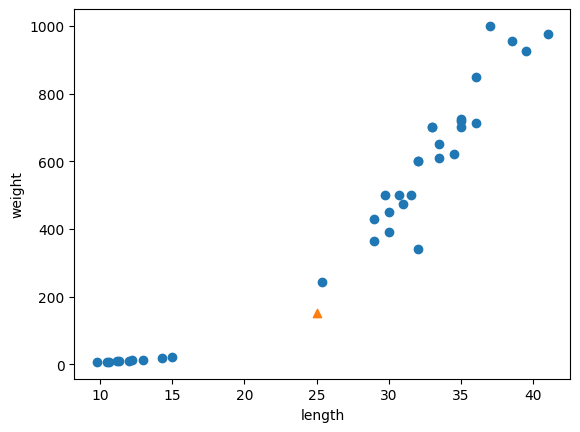

In [27]:
# 그래프확인
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1]) #훈련데이터 입력(파랑)
#marker : 모양지정 / ^ : 삼각형
plt.scatter(25,150,marker='^')  # 추가확인데이터입력(주항)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

## 결론

x축, y축의 비율이 다르기에 정확한 그래프로 판단할 수 없음

k-근접 이웃 알고리즘은 근접한 5개의 값으로 결과를 도출하기에 좀더 알아봐야함

### 참고데이터 길이확인

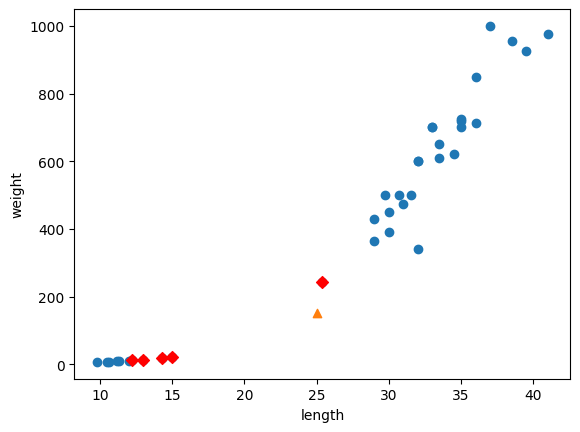

In [40]:
#참고데이터 길이 확인
distances, indexes = kn.kneighbors([[25,150]])

#그래프확인
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1]) #훈련데이터 입력(파랑)
plt.scatter(25,150,marker='^')  # 추가확인데이터입력(주항)
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D', color = "red") #이웃한 데이터
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

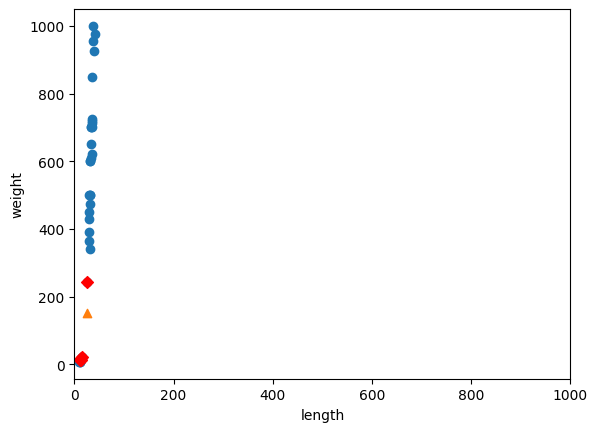

In [54]:
# x축비율 조정

#참고데이터 길이 확인
distances, indexes = kn.kneighbors([[25,150]])

#그래프확인
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1]) #훈련데이터 입력(파랑)
plt.scatter(25,150,marker='^')  # 추가확인데이터입력(주항)
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D', color = "red") #이웃한 데이터
plt.xlim((0,1000)) #y축과 범위 맞추기 / x축범위 : 0~1000
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [50]:
#k-근접 알고리즘의 참고데이터 5개
print("참고데이터 : ")
print(train_input[indexes])
print()
print("정답데이터 : ",train_target[indexes])
print()
print("거리 : ",distances)

참고데이터 : 
[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]

정답데이터 :  [[1. 0. 0. 0. 0.]]

거리 :  [[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 표준점수(Z점수)

각 특성값이 평균에서 표준편차의 몇배만큼 떨어져 있는지 나타냄

- 변환해야하는 값 : 입력데이터, 정답데이터, 추가데이터(결과를 알고 싶은 것

편차 : 변한 값 - 평균

분산 : 편차제곱의 합의 평균

표준편차 : 분산을 제곱근한 값

표준점수 : 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지 나타낸 값

<img src = "https://cloudfront-ap-northeast-1.images.arcpublishing.com/chosun/LVUWWQIG4DH6A6GFH7YBMB73LY.jpg">
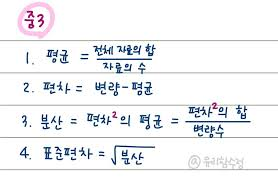

- axis : 중심선(기준선)
    - 1차배열 : 없음
    - 2차배열 : axis0 -> 행(위 -> 아래), axis1 -> 열(좌 -> 우)
    - 3차배열 : axis0 -> 높이, axis1 -> 행, axis3 -> 열

In [72]:
#브로드캐스팅 : std에 있는 두 표준편차를 다시 모든 행에 적용
#표준점수 = (원본데이터 - 평균) / 표준편차

#axis = 0: 행을 기준 => 행을 따라 각 열의 통계값 계산
#train_input : 36개의 요소와 2개의 특성을 가짐 (36,2)크기의 배열
mean = np.mean(train_input, axis=0) #평균
std = np.std(train_input, axis=0)   #표준편차

print(mean, std)

#scaled : 뼈대(트레이닝 뼈대를 만드는 변수)
train_scaled = (train_input - mean)/std #표준점수

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


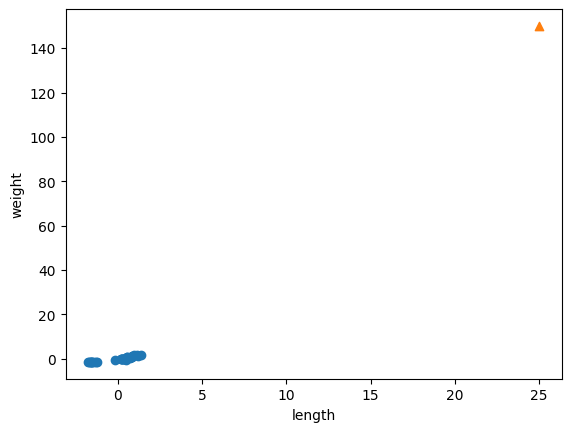

In [60]:
# 전처리데이터를 이용해서 모델 훈련
import matplotlib.pyplot as plt
plt.scatter(train_scaled[:,0], train_scaled[:,1]) #훈련데이터 입력(파랑)
plt.scatter(25,150,marker='^')  # 추가확인데이터입력(주항)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()
#결론 : 오른쪽 끝에 이상한 샘플이 있음 => 전처리된 데이터가 아님

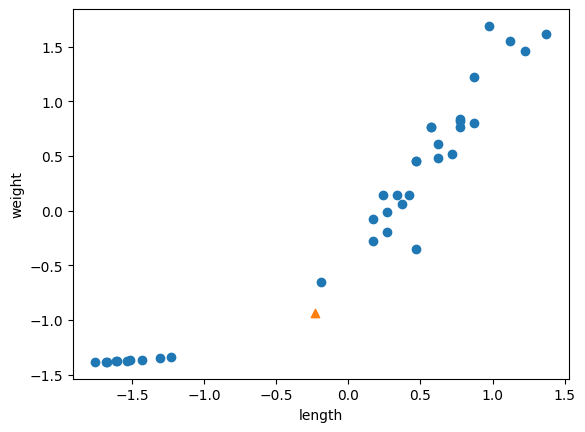

In [61]:
# 추가데이터 전처리
new = ([25,150]-mean) / std

# 그래프
import matplotlib.pyplot as plt
plt.scatter(train_scaled[:,0], train_scaled[:,1]) #훈련데이터 입력(파랑)
plt.scatter(new[0], new[1],marker='^')  # 추가확인데이터입력(주항)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

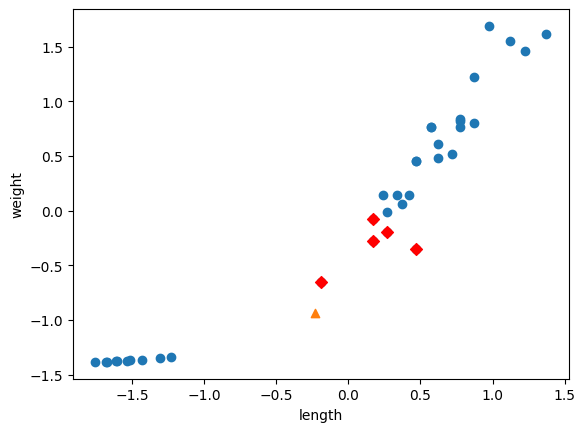

In [71]:
#최근접이웃 계산
distances, indexes = kn.kneighbors([new])

# 산점도
import matplotlib.pyplot as plt
plt.scatter(train_scaled[:,0], train_scaled[:,1]) #훈련데이터 입력(파랑)
plt.scatter(new[0], new[1],marker='^')  # 추가확인데이터입력(주항)
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D', color = "red") #이웃한 데이터
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 훈련

In [66]:
# 훈련시작
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [67]:
test_scaled = (test_input - mean) / std #표준점수화

In [69]:
#평가진행
kn.score = (test_scaled, test_target)
print(kn.predict(([new])))

[1.]
